In [1]:
import pandas as pd

df = pd.read_csv('/content/all_restaurants.csv')

restaurant_reviews = {}

for restaurant_name, group in df.groupby('Restaurant'):
    reviews = group['body'].tolist()
    restaurant_reviews[restaurant_name] = ' '.join(reviews)

In [2]:
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def clean_text(text):
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    cleaned_text = ' '.join(tokens)
    return cleaned_text

cleaned_reviews = [clean_text(review) for review in restaurant_reviews.values()]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=5000,
                                   min_df=0.2, stop_words='english',
                                   use_idf=True, ngram_range=(1, 3))
tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_reviews)

print("Shape of TF-IDF matrix:", tfidf_matrix.shape)


Shape of TF-IDF matrix: (20, 5000)


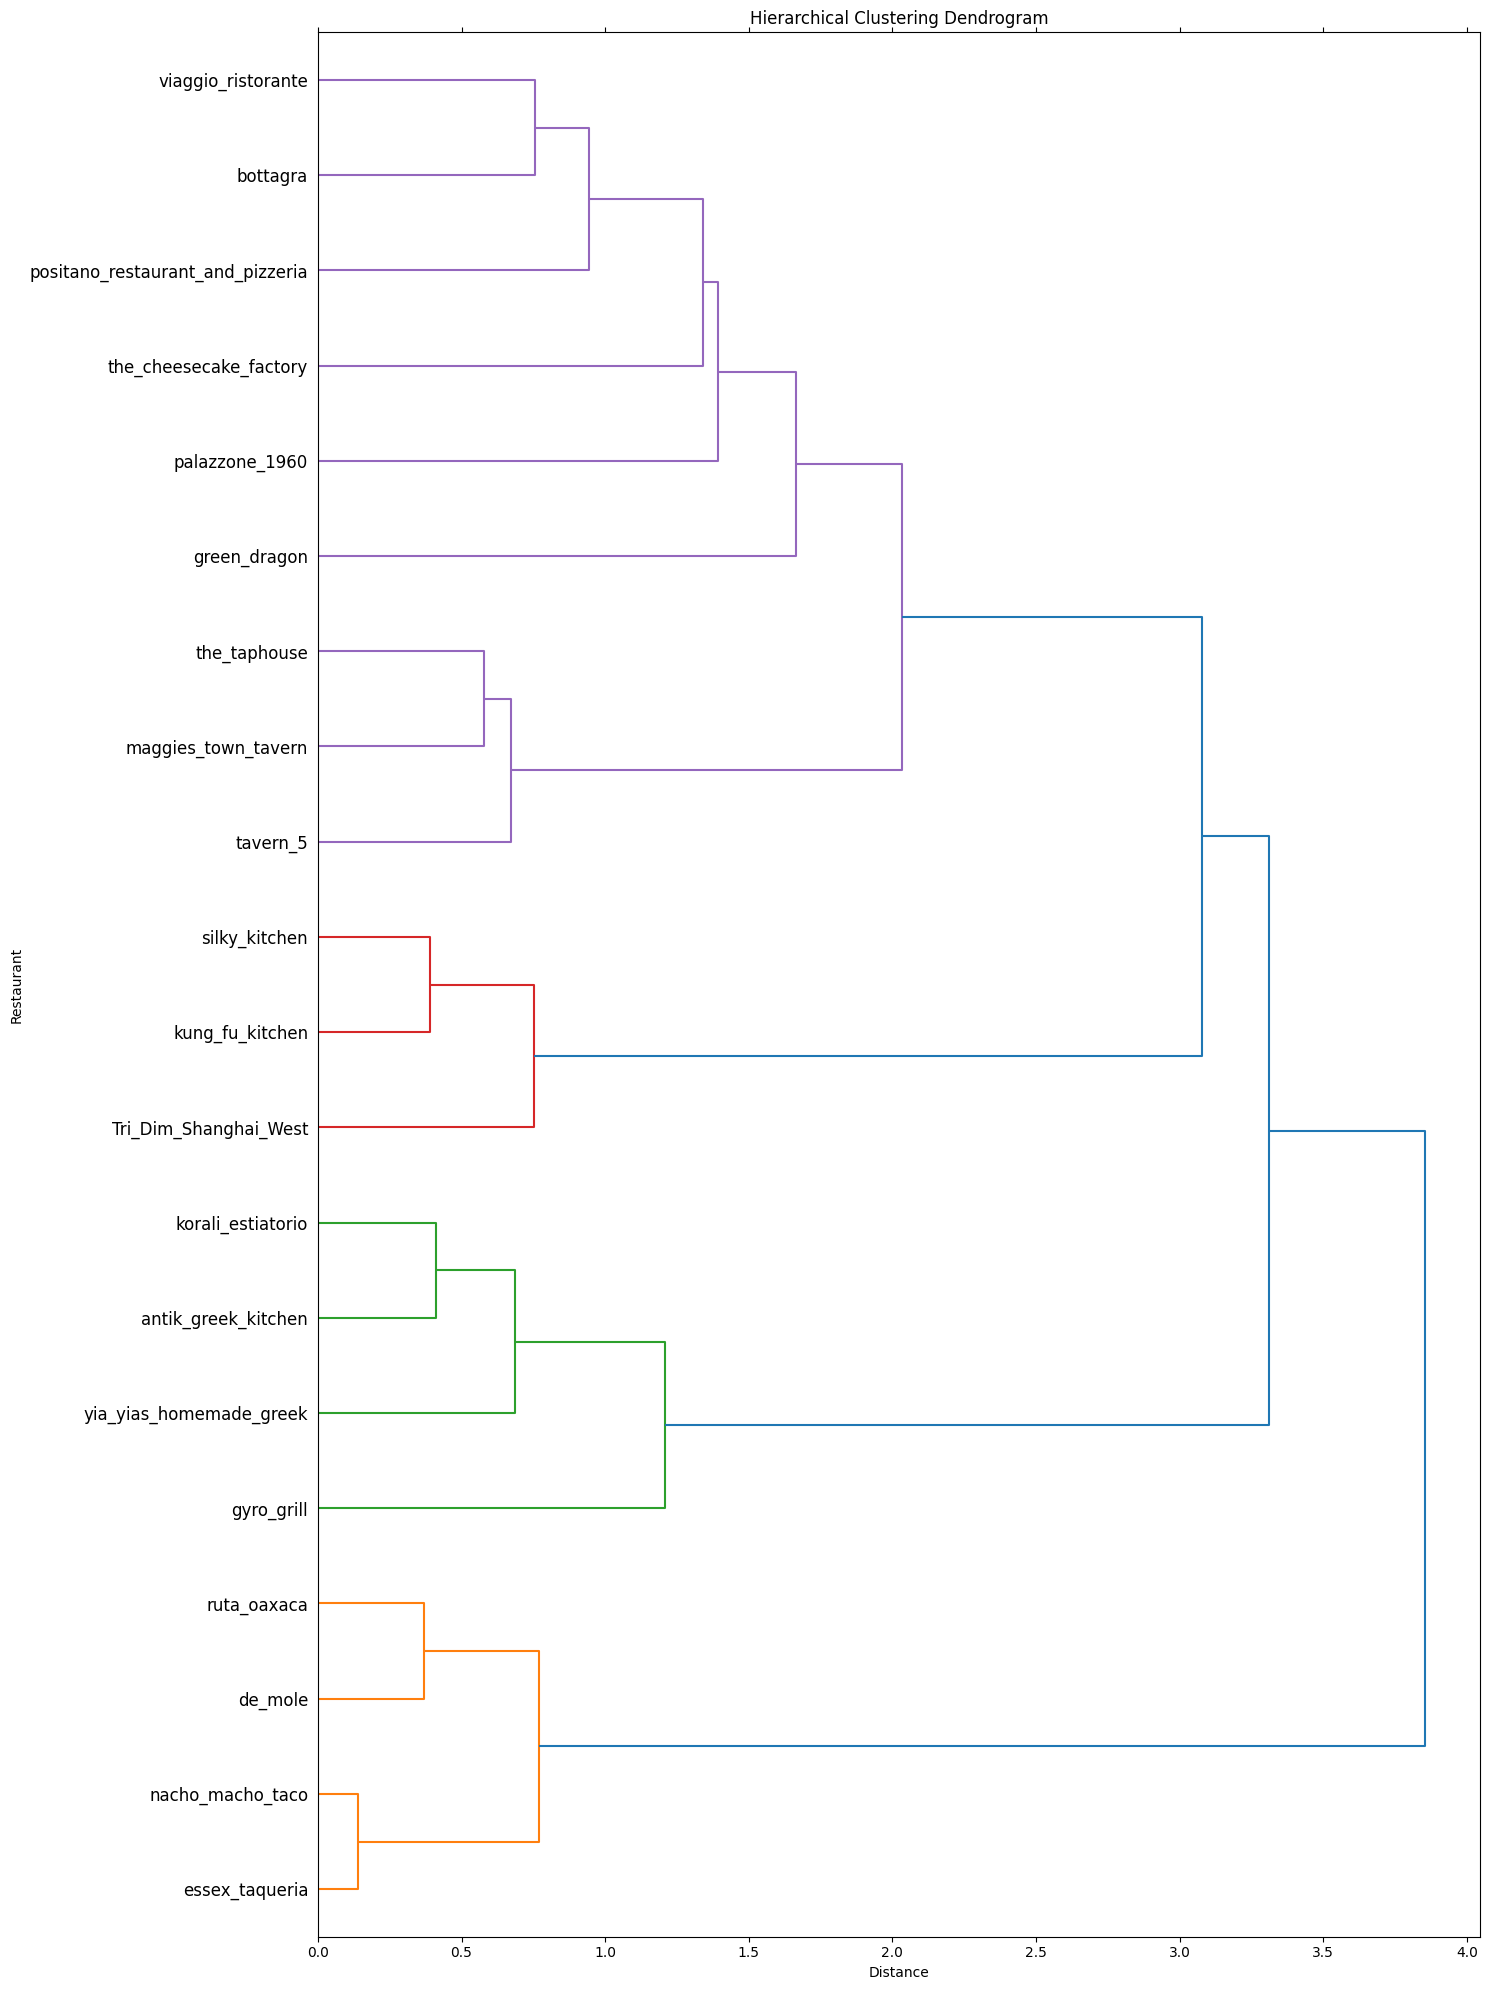

<Figure size 640x480 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import cosine_similarity

dist = 1 - cosine_similarity(tfidf_matrix)

linkage_matrix = ward(dist)

plt.figure(figsize=(15, 20))
dendrogram(linkage_matrix, orientation="right", labels=list(restaurant_reviews.keys()))

plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Distance')
plt.ylabel('Restaurant')
plt.tight_layout()
plt.show()

plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

After completing the clustering of the 20 restaurants the majority of them make a lot of sense. Mexican and Greek restaurants are as expected and Chinese restaurants have 3 clustered together.

The Green Dragon is labeled as a Chinese restuaurant but it finds itself connected to the Italian restaurants cluster and even closer to the American restaurants than the other 3 Chinese restaurants.

Three American restaurants are together but Cheesecake Factory which was considered American is right in the middle of the Italian options.

The other interesting finding of this dendrogram is that the Italian restaurants and American restaurants are more closely related than any of the other cuisines. I think this is due to the fact that Italian restaurants in America are much more americanized than they would if they were "traditional" Italian cuisine. After a further look they have many shared menu items such as pastas, similar sandwiches, fries and chicken tenders

I also notice the Mexican restaurants are extremely close to one another making me think that their menu items are extremely similar and are also unique to their cuisine.